## Transformação dos dados e Treinamento/Avaliação dos modelos de Aprendizado de Máquina

Este notebook contem a parte de treinamento e avaliação dos modelos, bem como transformação de dados caso sejam necessárias.

### Carregamento das bibliotecas necessárias

Usando sklearnex para que o processamento em CPU seja otimizado. Caso a biblioteca não esteja instalada será necessária sua instalação através do módulo pip com o seguinte comando : 

**pip install scikit-learn-intelex**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearnex import patch_sklearn
patch_sklearn()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nophaie.morais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Carregamento dos dados para treino

O carregamento do dataSet de treino já transformado no processo de ETL, do primeiro notebook.

* Como sugestão sugere-se que o arquivo sempre seja alocado na mesma pasta do projeto.

In [2]:
train = pd.read_csv('Train_rev2.csv')

****Retirando coluna Unnamed: 0****

Que veio de forma indesejada no carregamento do dataSet. 

In [3]:
train.drop('Unnamed: 0', axis=1, inplace=True)

****Visualizando o dataSet****

Usando o comando nomeDataFrame.head(), para visualizar as cinco primeiras linhas.

In [4]:
train.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,LowSalaryRange,HighSalaryRange,Rate_by,SalaryBin
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000,Yearly,0
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,25000,35000,Yearly,1
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,20000,40000,Yearly,1
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,25000,30000,Yearly,1
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000,Yearly,0


****Aqui carregamos os dados do dataset em uma cópia para caso necessitemos, só executamos novamente a partir desse ponto.****

In [5]:
df_tmp = train

## Iniciando as transformações.

* Inicialmente vamos verificar a distribuição dos dados da coluna SalaryNormalized. Pois talvez os dados não estejam em uma distribuição normal . 

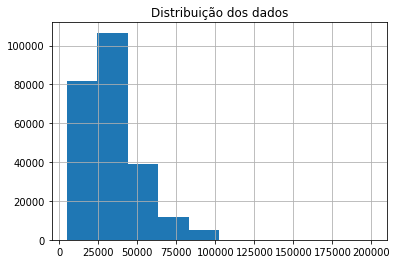

In [7]:
df_tmp.SalaryNormalized.hist()
plt.title('Distribuição dos dados')
plt.show()

****Pode-se observar que os dados tem uma assimetria a direita.****

Para corrigir isso vamos executar o comando a seguir, para usar o logaritmo nos dados da coluna 'SalaryNormalized', pois assim melhoraremos a distribuição escalar dos dados, depois disso vamos alocar em uma nova coluna chamada 'SalaryNormal'.

In [6]:
df_tmp['SalaryNormal'] = np.log(df_tmp.SalaryNormalized)

Após a criação da coluna 'SalaryNormal', partimos para a visualização dos dados para validarmos se houve a normalização. Para isso vamos plotar dois gráficos lado a lado, um com a distribuição sem normalização e ao lado um com a normalização efetuada através de logarítmo. 

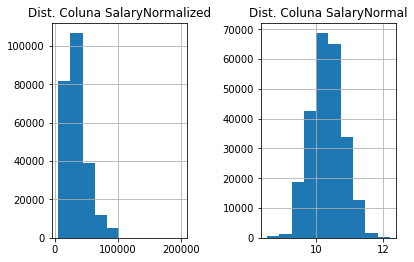

In [9]:
plt.subplot(1,2,1)
plt.title('Dist. Coluna SalaryNormalized')
df_tmp.SalaryNormalized.hist()

plt.subplot(1,2,2)
plt.title('Dist. Coluna SalaryNormal')
df_tmp.SalaryNormal.hist()
plt.tight_layout(2)
plt.show()

****Pode se observar que melhoramos bastante a distribuição dos dados com a aplicação do logarítmo nos dados.****

### Verificando o dataFrame.

Verificando a adição da coluna 'SalaryNormal'.

In [48]:
train.head(3)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,LowSalaryRange,HighSalaryRange,Rate_by,SalaryBin,SalaryNormal
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000,Yearly,0,10.126631
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,25000,35000,Yearly,1,10.308953
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,20000,40000,Yearly,1,10.308953


**Verificando dados do DataFrame**

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  244768 non-null  int64  
 1   Title               244768 non-null  object 
 2   FullDescription     244768 non-null  object 
 3   LocationRaw         244768 non-null  object 
 4   LocationNormalized  244768 non-null  object 
 5   ContractType        65442 non-null   object 
 6   ContractTime        180863 non-null  object 
 7   Company             212338 non-null  object 
 8   Category            244768 non-null  object 
 9   SalaryRaw           244768 non-null  object 
 10  SalaryNormalized    244768 non-null  int64  
 11  SourceName          244767 non-null  object 
 12  LowSalaryRange      244766 non-null  object 
 13  HighSalaryRange     194082 non-null  object 
 14  Rate_by             244768 non-null  object 
 15  SalaryBin           244768 non-nul

****Observa-se que ainda temos dados faltantes em algumas colunas, iremos completar as posições de dados faltantes da coluna 'Company' com o dado 'missing'.****

In [10]:
df_tmp['Company'].fillna('missing', inplace=True)

****Criando uma nova coluna 'Full_', com a concatenação das colunas 'FullDescription','LocationRaw','Company','Category'.****

In [11]:
df_tmp['Full_'] = df_tmp.Title.str.cat(df_tmp[['FullDescription','LocationRaw','Company','Category']], sep=" ")

****Conferindo a quantidade de linhas da nova coluna****

In [12]:
df_tmp.Full_.size

244768

### Criando função para o pré-processamento do texto

In [9]:
def tokenizaTexto(x) :
  # Criando uma lista para receber a saida com o texto já 'tokenizado'
  saida = []
  # Gerando um padrão para a expressão regular ser aplicada
  padrao = "([a-zA-Z]+(?:'[a-z]+)?)"
  # Criando uma lista com as Stop Words, números e pontos
  listaStopWords = stopwords.words('english')
  listaStopWords += list(string.punctuation)
  listaStopWords += ['0','1','2','3','4','5','6','8','9']

  # Percorrendo o texto passado.
  for txt in x:
    # Alocando o texto com a primeira filtragem.
    txt_tokens_raw = nltk.regexp_tokenize(txt, padrao)
    # Padronizando o texto
    txt_tokens_min =[palavra.lower() for palavra in txt_tokens_raw]
    # Retirando simbolos e números.
    txt_words_stopped = [palavra for palavra in txt_tokens_min if palavra not in listaStopWords]
    saida.append(txt_words_stopped)
  # Gerando a saída com o texto tokenizado
  return pd.Series(saida)

### Validando texto pré-processado

In [13]:
data = tokenizaTexto(df_tmp.FullDescription)
data

0         [engineering, systems, analyst, dorking, surre...
1         [stress, engineer, glasgow, salary, currently,...
2         [mathematical, modeller, simulation, analyst, ...
3         [engineering, systems, analyst, mathematical, ...
4         [pioneer, miser, engineering, systems, analyst...
                                ...                        
244763    [position, qualified, teacher, subject, specia...
244764    [position, qualified, teacher, nqt, subject, s...
244765    [position, qualified, teacher, subject, specia...
244766    [position, qualified, teacher, subject, specia...
244767    [entrepreneurial, growing, private, equity, ba...
Length: 244768, dtype: object

### Separando dados para treino e variável alvo

****Carregando as bibliotecas necessárias para a separação dos dados.****

In [14]:
from sklearn.model_selection import train_test_split

**Alocando a variável alvo a uma variável separada.**

In [15]:
target = df_tmp['SalaryNormal'] 

**Usando Train_test_split para separação entre dataset de treino e teste, usando os dados do corpus já limpos, também a variável target, com tamanho do dataset de teste com 20% do tamanho total de dados.**

In [16]:
X_treino, X_teste, y_treino, y_teste = train_test_split(data, target, test_size=0.2, random_state=42)

### Preparação e Treinamento dos modelos

A Biblioteca gensim, é dependente das bilbiotecas numpy e scipy. Caso elas não estejam instaladas a lib gensim não funcionará. As instalações podem ser feitas via terminal com o comando. 

* pip install numpy
* pip install scipy
* pip install gensim

In [17]:
# Executando a importação da biblioteca e um de seus modelos o Word2Vec
from gensim.models import Word2Vec

### Criando um modelo de Word2Vec

Utilizando os dados do corpus já pré-processados, também usando os parâmetros 'window','min_count'e'workers', o que faz com que a distância máxima entre a palavra prevista e a palavra atual seja de no máximo dez, também com que a contagem mínima de ocorrências de uma palavra a ser ignorada seja dez e que tenham se quatro threads de trabalho simultâneos o que fará com que o algoritmo seja executado de forma mais rápida, respectivamente . 

In [18]:
w2v_model1 = Word2Vec(data,
                window=10,
                # frequência mínima de contagem da palavra no corpus.
                min_count=10,
                workers=4)

### Treinando o Word2Vec

Treinando o modelo Word2Vec para usar os dados das palavras vetorizados na entrada do modelo preditivo.


In [19]:
w2v_model1.train(data,total_examples=w2v_model1.corpus_count, epochs=5)

(175309153, 186936560)

**Transformando os dados em um dicionário para poder usar no pipeline.**

In [21]:
w2v = dict(zip(w2v_model1.wv.index_to_key, w2v_model1.wv.vectors))

### Criando uma classe para a incorporação do texto nos vetores 

In [22]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(word2vec.values())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

# Treinando os modelos para o baseline

### Importando as bibliotecas

Importando as libs que serão usadas, nesta etapa pode-se ter um problema com tempo de treinamento. Pois o vetor de palavras criado pelo modelo Word2Vec tem um tamanho considerável. Neste caso estamos usando para o corpus apenas a coluna 'FullDescription', pois houveram problemas no treinamento do corpus com a concatenação das colunas 'Title','FullDescription','Company' e 'Category', onde o vetor de palavras ficou ainda maior e aumentou muito o custo computacional, o que também há de ser levado em conta em um projeto.

In [40]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
SEED = 42

#Usando Pipeline para os modelos. 

xgb =  Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Gradient Boosting', XGBRegressor(n_estimators=6000,learning_rate=0.01, max_depth=9))])

                
lr = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Linear Regression', LinearRegression(n_jobs=3))])

models = [('Gradient Boosting', xgb),
          ('Linear Regression', lr)]

# Criando uma variável com o score dos modelos depois de aplicada a Validação Cruzada com três folds.
scores = [(name, cross_val_score(model, X_treino, y_treino,cv=3).mean()) for name, model, in models]

**Verificando o score dos modelos.**

In [41]:
scores

[('Gradient Boosting', 0.6961096568275318),
 ('Linear Regression', 0.5359049317748663)]

**Ajustando o modelo aos dados de treino para efetuar as predições.**

In [42]:
xgb.fit(X_treino,y_treino)

Pipeline(steps=[('Word2Vec Vectorizer',
                 <__main__.MeanEmbeddingVectorizer object at 0x0000027CD7E97FD0>),
                ('Gradient Boosting',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.01,
                              max_delta_step=0, max_depth=9, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=6000, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                   

### Efetuando as predições e avaliações


* Efetuando as predições

In [43]:
y_pred = xgb.predict(X_teste)

**Verificando novamente o score entre as variáveis de teste.**

In [44]:
xgb.score(X_teste,y_teste)

0.7182421707014691

Verificando o Erro médio absoluto, porém como a coluna alvo fora normalizada através do logaritmo, ainda será necessário retirar o log. Para que tenhamos os números reais .

In [45]:
mean_absolute_error(y_pred,y_teste)

0.187168248392578

**Retirando o logaritmo das predições e dos dados de teste para verificar o Erro médio absoluto.**

In [46]:
t_pred = np.exp(y_pred)
t_teste = np.exp(y_teste)

### Verificando o Erro Médio Absoluto 

In [47]:
mean_absolute_error(t_pred,t_teste)

6543.925464247207

### Salvando os modelos de Word2Vec e XGBoost em disco para poder usá-los para a predição futuramente.

* Importando as bibliotecas necessárias.

In [51]:
import pickle
from joblib import dump, load

**Exportando e carregando o modelo já com o pipeline de transformação de dados. Porém ele ainda precisará da chamada da função tokenizaTexto para a tokenização e limpeza do texto da coluna 'FullDescription' para as predições. Portanto vamos exportar também a função para ser usada posteriormente.**

* Exportando o modelo e o pipeline de transformação e predição.

In [85]:
dump(xgb, 'w2v_XGBoost_PredictSalary.joblib')
xgbReg = load('w2v_XGBoost_PredictSalary.joblib')

* Exportando e carregando a função para a tokenização e limpeza do corpus para alimentação do algoritmo de predição.
* Essa exportação é útil para a utilização do modelo em uma página web ou por um service criado. 

In [86]:
dump(tokenizaTexto, 'tokenizaTexto.joblib')
functionToken = load('tokenizaTexto.joblib')

### Carregando dataSet de validação para efetuar teste de predição.

In [57]:
validacao = pd.read_csv('Valid_rev1.csv')

**Criando variável para receber a coluna 'FullDescription' do dataframe de validação e tokenizar o texto, para alimentar o modelo preditivo.** 

In [77]:
x_valid = token(validacao.FullDescription)

**Efetuando as predições.**

In [67]:
prediction_valid = xgbReg.predict(x_valid)

**Transformando os dados e alocando na coluna 'Salary' no dataframe.** 

In [72]:
validacao['Salary'] = np.exp(prediction_valid)

**Conferindo o dataSet.**

In [78]:
validacao.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SourceName,Salary
0,13656201,"Lead Technical Architect, C Banking",Lead Technical Architect required for a Tier *...,London,London,NaN,permanent,Scope AT Limited,IT Jobs,jobserve.com,72492.570312
1,14663195,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"LEEDS, West Yorkshire",Leeds,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,cv-library.co.uk,23981.939453
2,16530664,Mechanical / Chemical / Process Engineer Cool...,Mechanical / Chemical / Process Engineer Cool...,"Hampshire, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk,40131.023438
3,19047458,Trainee Mortgage Advisor West Midlands,"Are you a successful, results driven person? A...",West Midlands,West Midlands,NaN,permanent,Brite Recruitment,Accounting & Finance Jobs,cv-library.co.uk,21312.431641
4,20881907,Mortgage Services Consultant East Midlands,"Are you a successful, results driven person? D...",East Midlands,East Midlands,NaN,permanent,Brite Recruitment,Accounting & Finance Jobs,cv-library.co.uk,24606.042969


### Carregando dados do dataset de teste.

In [79]:
test_df = pd.read_csv('Test_rev1.csv')
exit_df = pd.read_csv('test.csv')

**Conferindo os dataSets.**

Validando se os dados estão corretamente distribuídos entre os datasets . 

In [84]:
test_df.Id[:10],exit_df[:10]

(0    11888454
 1    11988350
 2    12612558
 3    12613014
 4    22454872
 5    22579453
 6    25436391
 7    25436399
 8    25452547
 9    26178632
 Name: Id, dtype: int64,
          Id
 0  11888454
 1  11988350
 2  12612558
 3  12613014
 4  22454872
 5  22579453
 6  25436391
 7  25436399
 8  25452547
 9  26178632)

**Alocando o texto a ser usado na predição em uma variável 'x'.**

In [87]:
x = functionToken(test_df.FullDescription)

**Efetuando as predições para a submissão.**

In [88]:
pred = xgbReg.predict(x)

**Retornando as predições a escala sem a aplicação do logaritmo e alocando no dataSet de testes.**

In [90]:
test_df['Salary_pred'] = np.exp(pred)

**Validando as predições adicionadas ao dataSet de teste.**

In [91]:
test_df.head(10)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SourceName,Salary_pred
0,11888454,Business Development Manager,The Company: Our client is a national training...,"Tyne Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Teaching Jobs,cv-library.co.uk,19934.564453
1,11988350,Internal Account Manager,The Company: Founded in **** our client is a U...,"Tyne and Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Consultancy Jobs,cv-library.co.uk,32655.896484
2,12612558,Engineering Systems Analysts,Engineering Systems Analysts Surrey ****K Loca...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk,38969.765625
3,12613014,CIS Systems Engineering Consultant,CIS Systems Engineering Consultant Bristol So...,"Bristol, South West, South West",Bristol,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk,47577.527344
4,22454872,CNC Miller / Programmer Fanac,"CNC Miller / Programmer Fanac Fleet, Hampshire...","Fleet, Hampshire",Fleet,NaN,permanent,Gregory Martin International,Manufacturing Jobs,cv-library.co.uk,24948.523438
5,22579453,Sales Manager,My client is a leading supplier of precision m...,"Tyne Wear, North",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,Engineering Jobs,cv-library.co.uk,35195.203125
6,25436391,Junior Process Engineer,Junior Process Engineer We are seeking applica...,"Berkshire, South East",Berkshire,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk,41983.980469
7,25436399,Mechanical Engineer Water,Mechanical Engineer Water We are currently lo...,"Surrey, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,cv-library.co.uk,37353.933594
8,25452547,Chef De Partie needed **** rosette restaurant...,Chef De Partie needed **** rosette restaurant...,North East,North East England,NaN,NaN,Clear Selection,Hospitality & Catering Jobs,caterer.com,19326.419922
9,26178632,Assistant Accountant,Assistant Accountant Up to **** Bath A leading...,Bath,Bath,NaN,permanent,NaN,Accounting & Finance Jobs,hays.co.uk,18477.769531


### Adicionando as predições ao dataSet de submissão. 

In [92]:
exit_df['Salary_Prediction'] = test_df.Salary_pred

**Exportando para um .csv.**

In [94]:
exit_df.to_csv('submission.csv')